,time,sym,exch,Q1,Q2,X1,X10,X100,X101,X102,...,X93,X94,X95,X96,X97,X98,X99,Y1,Y2,date
6255000,35101000,SPX,cme,1.00,1.00,0.110048,1.154642,0.365922,0.601932,0.947039,...,0.821599,1.065129,0.496888,1.081180,1.184031,1.894004,-0.033514,26.484221,36.885033,2023-03-01
6255001,35102000,SPX,cme,1.00,1.00,0.635382,1.038147,-0.546625,-0.461508,-0.038699,...,0.080655,0.516037,-0.428270,0.006949,0.197313,1.155460,-0.569105,27.118216,37.202534,2023-03-01
6255002,35103000,SPX,cme,1.00,1.00,0.656325,1.020106,-0.396958,-0.226557,0.489506,...,0.234125,0.766339,-0.287771,0.236513,0.736676,1.316679,-0.311233,27.116507,37.510780,2023-03-01
6255003,35104000,SPX,cme,1.00,1.00,0.890574,1.349551,-0.013313,-0.087953,0.975536,...,0.722743,1.136700,0.095527,0.372919,1.245028,1.830079,0.058205,25.221476,34.698414,2023-03-01
6255004,35105000,SPX,cme,1.00,1.00,1.211060,1.219180,0.275898,0.101342,0.828281,...,0.819620,1.648215,0.391036,0.564365,1.116703,1.955107,0.557328,25.221476,34.490280,2023-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6704995,57596000,SPX,cme,0.21,0.12,0.352234,-1.181868,NaN,-0.386150,NaN,...,-0.679011,-0.860991,NaN,-1.146690,NaN,-2.003212,-0.325154,-1.812196,-1.315505,2023-03-31
6704996,57597000,SPX,cme,0.21,0.12,-0.110250,-2.079077,NaN,-0.540931,NaN,...,-1.800561,-1.490326,NaN,-1.313608,NaN,-3.187031,-0.933250,1.812853,1.315851,2023-03-31
6704997,57598000,SPX,cme,0.21,0.12,-0.248181,-2.231923,NaN,-0.984099,NaN,...,-2.271632,-2.093620,NaN,-1.779093,NaN,-3.736771,-1.502236,4.835736,3.854543,2023-03-31
6704998,57599000,SPX,cme,0.15,0.12,0.620908,NaN,NaN,-2.006201,NaN,...,NaN,-2.292643,NaN,-2.846991,NaN,NaN,-1.663266,5.440532,4.230755,2023-03-31


,Y1,X10,X104,X1,X106,X102,X100
datetime,,,,,,,
2022-01-03 09:45:01,-4.967191e+01,-0.440099,-0.267032,-1.985130,0.223038,-0.453612,0.044736
2022-01-03 09:45:02,-4.889528e+01,-0.380986,-0.177605,-0.933646,-0.737723,-0.622912,-0.854499
2022-01-03 09:45:03,-4.706744e+01,-0.180915,0.135138,-0.579249,-0.777266,-0.320432,-0.854372
2022-01-03 09:45:04,-4.759041e+01,-0.028344,0.516732,-0.658292,-0.314707,-0.057465,-0.044026
2022-01-03 09:45:05,-4.811086e+01,-0.100419,0.562226,-1.331419,0.404281,0.373589,0.273158
...,...,...,...,...,...,...,...
2023-02-28 15:59:56,-8.803647e+00,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-28 15:59:57,-8.175329e+00,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-28 15:59:58,-5.661267e+00,-1.136721,-1.879111,-1.213168,-0.615870,-1.743618,NaN


Processing Y1 Dataset for 1M
Epoch 1/100
10335/10335 [==============================] - 17s 2ms/step - loss: 0.0031 - val_loss: 0.0029 - lr: 0.0010
Epoch 2/100
10335/10335 [==============================] - 16s 2ms/step - loss: 0.0029 - val_loss: 0.0029 - lr: 0.0010
Epoch 3/100
10335/10335 [==============================] - 16s 2ms/step - loss: 0.0029 - val_loss: 0.0029 - lr: 0.0010
Epoch 4/100
10335/10335 [==============================] - 16s 2ms/step - loss: 0.0029 - val_loss: 0.0029 - lr: 0.0010
Epoch 5/100
10335/10335 [==============================] - 16s 2ms/step - loss: 0.0029 - val_loss: 0.0029 - lr: 0.0010
Epoch 6/100
10335/10335 [==============================] - 16s 2ms/step - loss: 0.0029 - val_loss: 0.0029 - lr: 0.0010
Epoch 7/100
10335/10335 [==============================] - 16s 2ms/step - loss: 0.0029 - val_loss: 0.0029 - lr: 0.0010
Epoch 8/100
10335/10335 [==============================] - 18s 2ms/step - loss: 0.0029 - val_loss: 0.0028 - lr: 0.0010
Epoch 9/100
10335/1

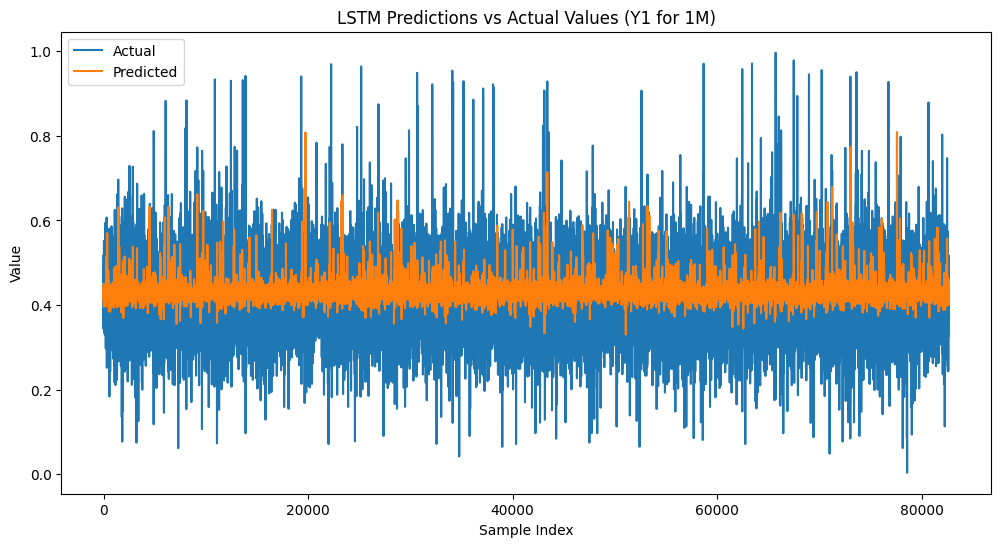

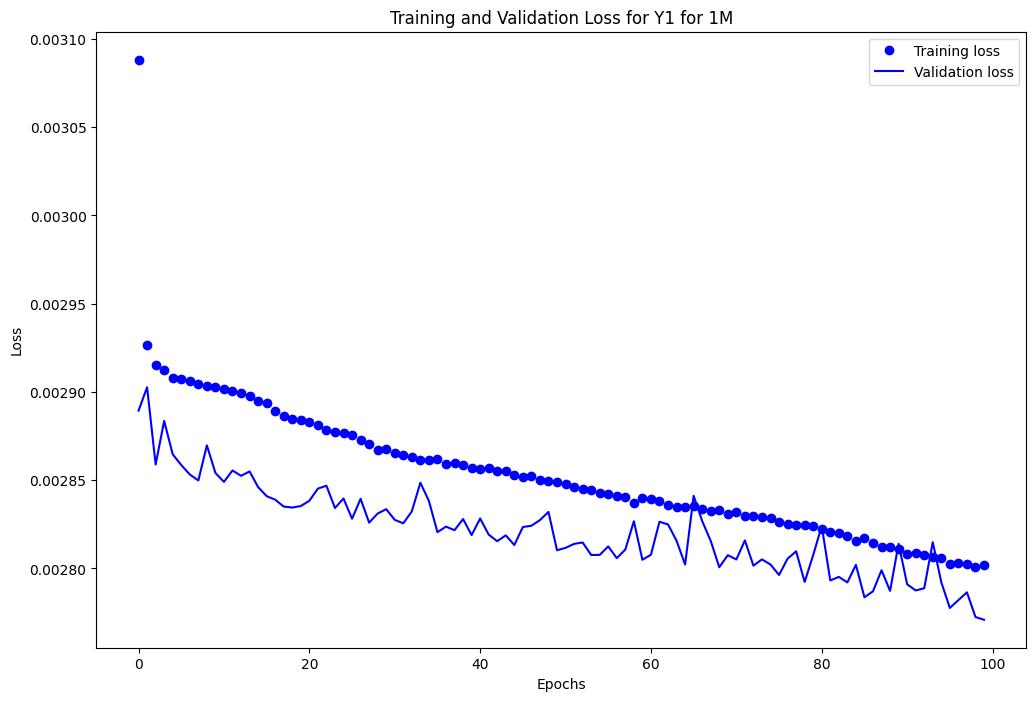

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model for Y1 for 1M saved successfully.


,time,sym,exch,Q1,Q2,X1,X10,X100,X101,X102,...,X93,X94,X95,X96,X97,X98,X99,Y1,Y2,date
6255000,35101000,SPX,cme,1.00,1.00,0.110048,1.154642,0.365922,0.601932,0.947039,...,0.821599,1.065129,0.496888,1.081180,1.184031,1.894004,-0.033514,26.484221,36.885033,2023-03-01
6255001,35102000,SPX,cme,1.00,1.00,0.635382,1.038147,-0.546625,-0.461508,-0.038699,...,0.080655,0.516037,-0.428270,0.006949,0.197313,1.155460,-0.569105,27.118216,37.202534,2023-03-01
6255002,35103000,SPX,cme,1.00,1.00,0.656325,1.020106,-0.396958,-0.226557,0.489506,...,0.234125,0.766339,-0.287771,0.236513,0.736676,1.316679,-0.311233,27.116507,37.510780,2023-03-01
6255003,35104000,SPX,cme,1.00,1.00,0.890574,1.349551,-0.013313,-0.087953,0.975536,...,0.722743,1.136700,0.095527,0.372919,1.245028,1.830079,0.058205,25.221476,34.698414,2023-03-01
6255004,35105000,SPX,cme,1.00,1.00,1.211060,1.219180,0.275898,0.101342,0.828281,...,0.819620,1.648215,0.391036,0.564365,1.116703,1.955107,0.557328,25.221476,34.490280,2023-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6704995,57596000,SPX,cme,0.21,0.12,0.352234,-1.181868,NaN,-0.386150,NaN,...,-0.679011,-0.860991,NaN,-1.146690,NaN,-2.003212,-0.325154,-1.812196,-1.315505,2023-03-31
6704996,57597000,SPX,cme,0.21,0.12,-0.110250,-2.079077,NaN,-0.540931,NaN,...,-1.800561,-1.490326,NaN,-1.313608,NaN,-3.187031,-0.933250,1.812853,1.315851,2023-03-31
6704997,57598000,SPX,cme,0.21,0.12,-0.248181,-2.231923,NaN,-0.984099,NaN,...,-2.271632,-2.093620,NaN,-1.779093,NaN,-3.736771,-1.502236,4.835736,3.854543,2023-03-31
6704998,57599000,SPX,cme,0.15,0.12,0.620908,NaN,NaN,-2.006201,NaN,...,NaN,-2.292643,NaN,-2.846991,NaN,NaN,-1.663266,5.440532,4.230755,2023-03-31


,Y2,X119,X121,X120,X118,X10,X1,X122,X105
datetime,,,,,,,,,
2022-01-03 09:45:01,-61.707756,0.0,-0.248765,0.000000,0.0,-0.440099,-1.985130,0.000000,-0.358980
2022-01-03 09:45:02,-62.025402,0.0,-0.541802,0.132091,0.0,-0.380986,-0.933646,-0.775565,-1.275239
2022-01-03 09:45:03,-57.324017,0.0,-0.247763,0.949864,0.0,-0.180915,-0.579249,0.000000,-1.292093
2022-01-03 09:45:04,-58.769417,0.0,0.000000,1.211052,0.0,-0.028344,-0.658292,0.000000,-0.481662
2022-01-03 09:45:05,-59.984489,0.0,0.000000,1.127890,0.0,-0.100419,-1.331419,0.236589,-0.157728
...,...,...,...,...,...,...,...,...,...
2023-02-28 15:59:56,-5.074302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-28 15:59:57,-4.039149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-28 15:59:58,-1.761056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Processing Y2 Dataset for 1M
Epoch 1/100
10335/10335 [==============================] - 17s 2ms/step - loss: 0.0034 - val_loss: 0.0033 - lr: 0.0010
Epoch 2/100
10335/10335 [==============================] - 16s 2ms/step - loss: 0.0032 - val_loss: 0.0032 - lr: 0.0010
Epoch 3/100
10335/10335 [==============================] - 16s 2ms/step - loss: 0.0032 - val_loss: 0.0031 - lr: 0.0010
Epoch 4/100
10335/10335 [==============================] - 16s 2ms/step - loss: 0.0032 - val_loss: 0.0032 - lr: 0.0010
Epoch 5/100
10335/10335 [==============================] - 16s 2ms/step - loss: 0.0032 - val_loss: 0.0031 - lr: 0.0010
Epoch 6/100
10335/10335 [==============================] - 16s 2ms/step - loss: 0.0032 - val_loss: 0.0032 - lr: 0.0010
Epoch 7/100
10335/10335 [==============================] - 16s 2ms/step - loss: 0.0031 - val_loss: 0.0031 - lr: 0.0010
Epoch 8/100
10335/10335 [==============================] - 16s 2ms/step - loss: 0.0031 - val_loss: 0.0031 - lr: 0.0010
Epoch 9/100
10335/1

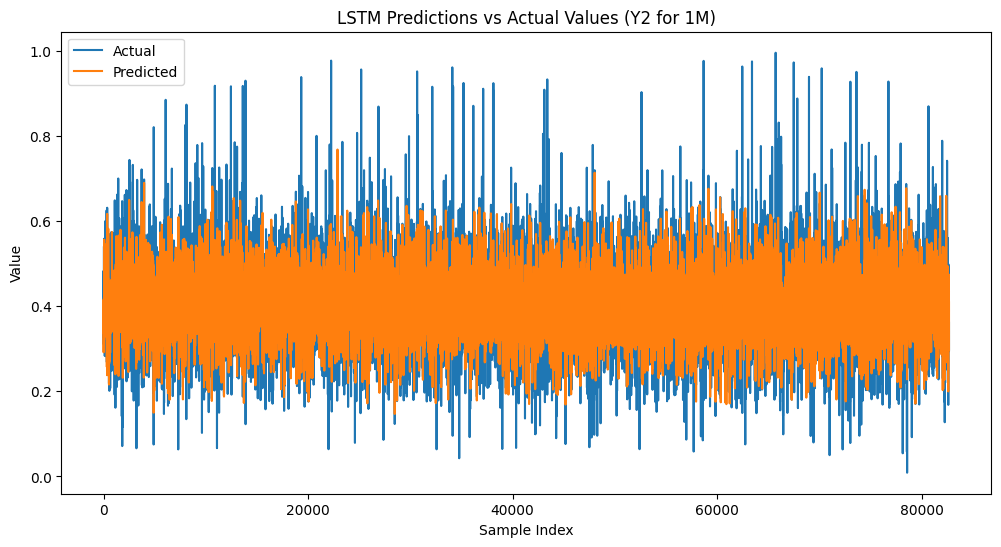

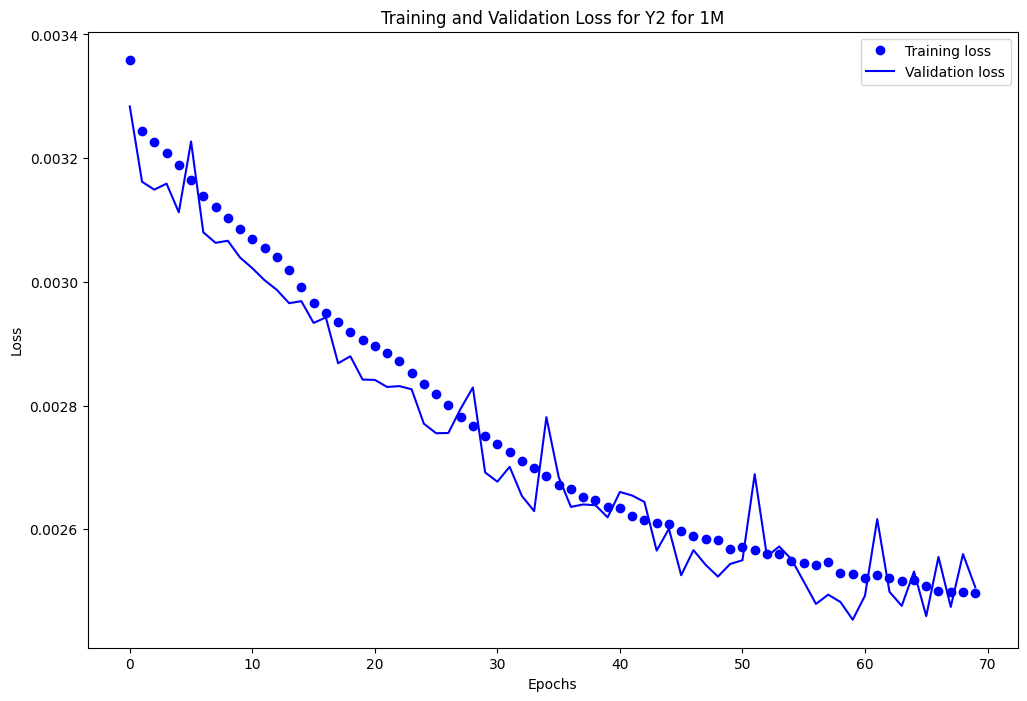

Model for Y2 for 1M saved successfully.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard
from scipy.stats import skew, kurtosis
from statsmodels.graphics.tsaplots import plot_acf

# Prepare Data for LSTM Model
def prepare_data(data, features, target, n_steps=1):
    selected_columns = features + [target]
    data = data[selected_columns].dropna()

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    X, y = [], []
    for i in range(n_steps, len(scaled_data)):
        X.append(scaled_data[i - n_steps:i, 0:len(features)])  # Select only feature columns
        y.append(scaled_data[i, -1])  # Append target value
    return np.array(X), np.array(y)

# Create LSTM Model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Evaluate Model
def evaluate_model(model, X_test, y_test, dataset_name, training_period):
    val_predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, val_predictions)
    print(f'Mean Squared Error on Test Data ({dataset_name} for {training_period}): {mse}')
    return val_predictions, mse

# Plot Prediction Results
def plot_results(y_true, predictions, title, subset=None, filename=None):
    if subset:
        indices = np.random.choice(range(len(y_true)), subset, replace=False)
        y_true = y_true[indices]
        predictions = predictions[indices]
    
    plt.figure(figsize=(12, 6))
    plt.plot(y_true, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.title(title)
    plt.ylabel('Value')
    plt.xlabel('Sample Index')
    plt.legend()
    if filename:
        plt.savefig(f'{filename}.png')
    plt.show()

# Plot Losses
def plot_losses(history, dataset_name, filename, training_period):
    plt.figure(figsize=(12, 8))
    plt.plot(history.history['loss'], 'bo', label='Training loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation loss')
    plt.title(f'Training and Validation Loss for {dataset_name} for {training_period}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    if filename:
        plt.savefig(f'{filename}.png')
    plt.show()

# Process Each Dataset
def process_dataset(dataset_name, data, n_steps, training_period):
    print(f"Processing {dataset_name} Dataset for {training_period}")
    
    # Prepare Data
    features = [col for col in data.columns if col.startswith('X')]
    X, y = prepare_data(data, features, dataset_name, n_steps)

    # Splitting datasets into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build and Train the LSTM Model
    model = create_lstm_model(X_train.shape[1:])
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001, verbose=1)
    tensorboard_callback = TensorBoard(log_dir=f'./logs/{dataset_name}', histogram_freq=1)

    history = model.fit(X_train, y_train, epochs=100, batch_size=32, 
                        validation_data=(X_test, y_test), 
                        callbacks=[early_stopping, reduce_lr, tensorboard_callback])
    model.summary()

    # Evaluate Model on Test Data
    val_predictions, test_mse = evaluate_model(model, X_test, y_test, dataset_name,training_period)

    # Plotting and saving
    plot_results(y_test, val_predictions, f'LSTM Predictions vs Actual Values ({dataset_name} for {training_period})', 
                 filename=f"{dataset_name}_{training_period}_predictions")
    plot_losses(history, dataset_name, 
                f"{dataset_name}_{training_period}_losses", training_period)

    # Save the model
    model.save(f'{dataset_name}_model_{training_period}.h5')
    print(f"Model for {dataset_name} for {training_period} saved successfully.")

    return model, X, y

# Main Execution Flow
def main(dataset_name, training_period):
    # Load and Display Data
    oos_data = pd.read_pickle('out_of_sample_data.pkl')
    display(oos_data)

    # Load specific dataset based on the dataset name
    if dataset_name == 'Y1':
        selected_data = pd.read_pickle('Y1_selected_GBR.pkl')
    elif dataset_name == 'Y2':
        selected_data = pd.read_pickle('Y2_Selected_GBR.pkl')
    else:
        raise ValueError("Invalid dataset name. Choose 'Y1' or 'Y2'.")
    
    display(selected_data)

    # Process the specified dataset
    n_steps = 3
    model, X_oos, true_y_oos = process_dataset(dataset_name, selected_data.last(training_period), n_steps, training_period)

if __name__ == "__main__":
    main('Y1', "1M")
    main('Y2', "1M")

